# 데이터불러오기

In [2]:
#파일 직접 업로드하기
from google.colab import files
myfile = files.upload()

Saving train.csv to train.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('train.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


#### df 데이터 프레임에서 Cabin, Name, Ticket 열은 제거해주세요

In [6]:
df.drop(['Cabin','Name','Ticket'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


#### df 데이터 프레임의 모든 결측치를 제거해봅시다

In [7]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

#### 원할한 과제 진행을 위해 아래 코드 한번 실행시켜주세요

In [11]:
df = df.reset_index(drop=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
707,0,3,female,39.0,0,5,29.1250,Q
708,0,2,male,27.0,0,0,13.0000,S
709,1,1,female,19.0,0,0,30.0000,S
710,1,1,male,26.0,0,0,30.0000,C


#### df 데이터 프레임을 features와 target으로 구분지읍시다
#### target = Survived, features는 그 외 모든 변수

In [15]:
features = df.drop(['Survived'],axis=1)
target = df[['Survived']]

In [16]:
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  712 non-null    int64
dtypes: int64(1)
memory usage: 5.7 KB


#### features 데이터 프레임을 카테고리형 변수(Pclass, Sex, Embarked),
#### 연속형 변수('Age','SibSp','Parch','Fare')로 구분하여 각각
#### features_cat, features_con 변수에 저장해주세요

In [17]:
features_cat = features[['Pclass','Sex','Embarked']]
features_con = features[['Age','SibSp','Parch','Fare']]

#### features_cat.info()를 통해 데이터의 자료형을 확인해봅시다

In [20]:
features_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Pclass    712 non-null    int64 
 1   Sex       712 non-null    object
 2   Embarked  712 non-null    object
dtypes: int64(1), object(2)
memory usage: 16.8+ KB


#### features_cat 데이터프레임을 숫자로 인코딩합시다
#### 그리고 features_cat의 모든 열이 int 자료형으로 지정되도록 확인합시다

In [22]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
features_cat['Sex'] = encoder.fit_transform(features_cat['Sex'].values)
features_cat['Embarked'] = encoder.fit_transform(features_cat['Embarked'].values)
features_cat['Pclass'] = encoder.fit_transform(features_cat['Pclass'].values)

features_cat.info()

# labelencoding??? onehotencoding?? 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Pclass    712 non-null    int64
 1   Sex       712 non-null    int64
 2   Embarked  712 non-null    int64
dtypes: int64(3)
memory usage: 16.8 KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

#### features_con 데이터 프레임은 표준화 작업을 진행해줍시다
#### 그리고 features_con_std 변수에 데이터 프레임 형태로 저장해줍시다

In [23]:
stand = StandardScaler()
features_con_std = pd.DataFrame(stand.fit_transform(features_con),columns = features_con.columns)

#### 경사 하강법 구현을 위해 적절한 데이터를 찾아보겠습니다

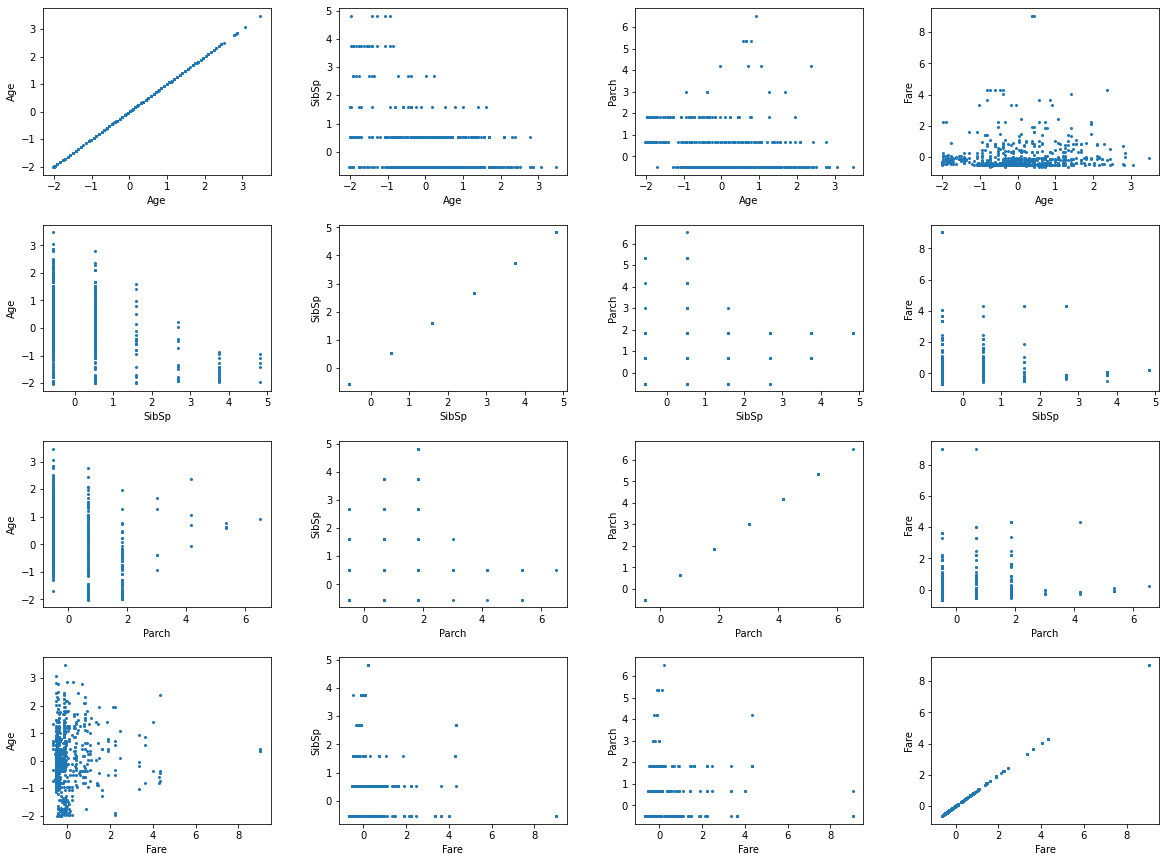

In [24]:
f, axes = plt.subplots(4, 4)
f.set_size_inches((20, 15))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

col_lis = list(features_con_std.columns)
for i in range(4):
  for j in range(4):
    axes[i,j].scatter(features_con_std[col_lis[i]],features_con_std[col_lis[j]],s = 4)
    axes[i,j].set_xlabel(col_lis[i])
    axes[i,j].set_ylabel(col_lis[j])

plt.show()

#### 앞으로의 실습에서 features_con_std 데이터 프레임의 
#### x = Age, y = Fare를 사용해보도록 합시다

#### 우선 훈련셋, 테스트 셋으로 데이터 구분합시다(test_size = 0.3, random_state = 42)

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features_con_std['Age'],features_con_std['Fare'],test_size=0.3,random_state=42)

In [39]:
x_train.shape
y_train.shape

(498,)

#### 경사하강법 코드를 실행하여 최적의 w,b를 찾아주세요

In [40]:
errors = []
ww = []
# random 한 값으로 w, b의 초기값을 설정합니다
w = np.random.uniform(low=-1.0, high=1.0)
b = np.random.uniform(low=-1.0, high=1.0)

x = x_train
y = y_train

#에포크()
num_epoch = 150
learning_rate = 0.1

for epoch in range(num_epoch):
    y_hat = x * w + b
    error = ((y_hat - y)**2).mean()
    if error < 0.0005:
        break
    
    w = w - learning_rate * ((y_hat - y) * x).mean()
    b = b - learning_rate * (y_hat - y).mean()
    
    errors.append(error)
    ww.append(w)

    if epoch % 5 == 0:
        print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch, w, b, error))

print("----" * 15)
print(epoch,'w:' ,round(w,5),'b:' ,round(b,5), 'error:',round(error,5))

 0 w = 0.64181, b = -0.30478 error = 1.24753
 5 w = 0.41160, b = -0.20293 error = 0.94339
10 w = 0.27643, b = -0.14192 error = 0.83784
15 w = 0.19705, b = -0.10539 error = 0.80120
20 w = 0.15044, b = -0.08352 error = 0.78848
25 w = 0.12307, b = -0.07043 error = 0.78406
30 w = 0.10699, b = -0.06260 error = 0.78252
35 w = 0.09755, b = -0.05792 error = 0.78199
40 w = 0.09200, b = -0.05512 error = 0.78181
45 w = 0.08874, b = -0.05344 error = 0.78174
50 w = 0.08683, b = -0.05244 error = 0.78172
55 w = 0.08570, b = -0.05184 error = 0.78171
60 w = 0.08504, b = -0.05149 error = 0.78171
65 w = 0.08465, b = -0.05127 error = 0.78171
70 w = 0.08443, b = -0.05114 error = 0.78171
75 w = 0.08429, b = -0.05107 error = 0.78171
80 w = 0.08421, b = -0.05102 error = 0.78171
85 w = 0.08417, b = -0.05100 error = 0.78171
90 w = 0.08414, b = -0.05098 error = 0.78171
95 w = 0.08412, b = -0.05097 error = 0.78171
100 w = 0.08411, b = -0.05096 error = 0.78171
105 w = 0.08411, b = -0.05096 error = 0.78171
110 w = 

#### 실습 결과 나타난 최적의 w, b 값을 이용하여 predict 데이터를 만드세요


In [41]:
yy = w*x_test+b 
y_pred = np.array(yy)

y_pred.shape

(214,)

#### y_test와 y_pred를 이용하여 MSE를 구해보세요

In [43]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pred,y_test)

print(mse)

1.4880360556942627


#### w값에 따른 오차를 그래프를 통해 시각화 해보세요
#### 위 경사하강법 코드에서 만든 ww, errors 리스트를 활용

In [44]:
print(ww)
print(errors)

[0.6418090370966093, 0.5854794082363469, 0.5348401990324058, 0.489316460687669, 0.44839134640382566, 0.41160023879323765, 0.3785254709594252, 0.3487915812208894, 0.32206104752313836, 0.29803045303997416, 0.27642703936943913, 0.25700560813813644, 0.23954573579010574, 0.22384926989815518, 0.20973807853705664, 0.1970520271357439, 0.18564715981235838, 0.17539406452110398, 0.1661764034298584, 0.1578895918261251, 0.15043961053757532, 0.14374193837133514, 0.13772059244059048, 0.1323072654735346, 0.1274405503021235, 0.12306524271907276, 0.11913171478230195, 0.11559535144673885, 0.11241604412314611, 0.1095577354106121, 0.10698800983091643, 0.10467772591575138, 0.10260068546770006, 0.10073333623828419, 0.09905450464610281, 0.0975451554994055, 0.09618817599426169, 0.09496818153528955, 0.0938713411738296, 0.09288522068130921, 0.09199864147587712, 0.09120155380047072, 0.09048492271235899, 0.08984062558972289, 0.08926135999164442, 0.08874056082546429, 0.08827232588117201, 0.08785134888751235, 0.0874

Text(0, 0.5, 'error')

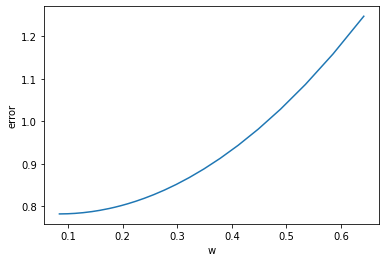

In [45]:
plt.plot(ww,errors)
plt.xlabel('w')
plt.ylabel('error')


#### 경사하강법을 통해 구한 식을 plt.plot을 통한 직선, Age와 Fare의 분포는 plt.scatter로 같이 시각화 해봅시다

Text(0, 0.5, 'Fare')

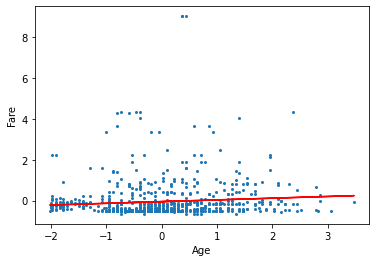

In [50]:
plt.plot(features_con_std['Age'],w*np.array(features_con_std['Age'])+b ,c='r')
plt.scatter(features_con_std['Age'],features_con_std['Fare'],s=4)
plt.xlabel('Age')
plt.ylabel('Fare')

## 확률적 경사하강법(직접 구현보단 SGDRegressor라는 패키지를 사용합시다)

### SGDRegressor 패키지를 불러오고, 파라미터 세팅은 아래와 같이 진행해봅시다
### from sklearn.linear_model import SGDRegressor

#### shuffle = True
#### learning_rate = 'invscaling'
#### eta0 = 0.5
#### max_iter = 1000
#### penalty = None

In [51]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(shuffle=True,learning_rate='invscaling',eta0=0.5,max_iter=1000,penalty=None)

#### 데이터를 훈련, 테스트 셋으로 나누어주세요(test_size = 0.1, random_state = 42)

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_con_std['Age'],features_con_std['Fare'],test_size=0.1,random_state=42)

#### SGDRegressor에 데이터를 투입하기 위해선 데이터가 (-1,1) 형태의 넘파이 배열이여야 합니다
#### array([1],
####           [2],
####           [3])
#### x_train, y_train을 형태로 reshape 함수를 이용해 가공해주세요

In [55]:
x = np.array(x_train).reshape(-1,1)
y = np.array(y_train).reshape(-1,1)

x.shape

(640, 1)

#### 위에서 선언한 sgd_reg에 x와 y를 fit해주세요

In [56]:
sgd_reg.fit(x,y)

print(sgd_reg.coef_)
print(sgd_reg.intercept_)

[0.0505471]
[0.02926722]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### 학습된 모델에 x_test를 통해 y_pred를 만들어주세요
#### (이때 투입될 x_test도 reshape(-1,1)해야 투입 가능합니다)

In [60]:
x_test_re = np.array(x_test).reshape(-1,1)
y_test_re = np.array(y_test).reshape(-1,1)

y_pred = sgd_reg.predict(x_test_re)

#### 마찬가지로 예측치와 y_test간의 mse를 산출해봅시다

In [61]:
mse = mean_squared_error(y_test_re,y_pred)
print(mse)

2.1723061796207106


## 미니배치 경사하강법

### 다시 한번 훈련, 테스트 데이터를 나눠볼게요(x = Age열, y = Fare열)
### test_size = 0.1, random_state = 42

In [62]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_con_std['Age'], features_con_std['Fare'], test_size = 0.1, random_state = 42)

### 이번엔 4개의 훈련, 테스트 데이터 모두 np.array를 통해 넘파이 배열로 전환해주세요

In [63]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

#### 혹시 모르니 중간에 x_train, y_train, x_test, y_test의 shape을 확인해주고 갑시다. train은 640, test는 72가 나오면 맞습니다

In [64]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(640,)
(640,)
(72,)
(72,)


#### 미니배치 경사하강법 코드는 아래와 같습니다. 


In [65]:
num_epoch=10
learning_rate=0.1
w = np.random.uniform(low=0, high=1.0)
b = np.random.uniform(low=0, high=1.0)
ww = []
err = []

for epoch in range(num_epoch):
    print("epoch: ", epoch)
    print("-"*50)
    batch_size = 60
    batch_number = 100/10
    start = 0
    end = 60
    for iteration in range(int(batch_number)):
    
        #매 iteration마다 batch_size=60에 해당하는 데이터 셋을 가져옴
        x_batch = x_train[start: end]
        y_batch = y_train[start: end]
        
        start += 10
        end += 10

        # 선택한 batch의 예측값
        predict_batch = w*x_batch + b

        # 가중치 업데이트
        w = w - 2*learning_rate*((predict_batch - y_batch)*x_batch).mean()
        b = b - 2*learning_rate * (predict_batch - y_batch).mean()

        #error값은 전체 데이터셋의 오류값을 계산해야한다.
        predict = w*x + b
        error = ((y - predict)**2).mean()

        print("iteration ", iteration, "w =", w, "b= ",b, 'error= ', error)
        ww.append(w)
        err.append(error)

    if error < 0.000001:
            break
print("최종: ","w= ", w, "b= ", b, "error= ", error)

epoch:  0
--------------------------------------------------
iteration  0 w = 0.3649348087284422 b=  0.31917796409545096 error=  1.0499701058973145
iteration  1 w = 0.34221785604131494 b=  0.2698474127037628 error=  1.0059432628562568
iteration  2 w = 0.3197808330850535 b=  0.23793825478154632 error=  0.9772042595415755
iteration  3 w = 0.2998903666812766 b=  0.21503174688786314 error=  0.9569469291275418
iteration  4 w = 0.28532322512660585 b=  0.19604376090690734 error=  0.9422456370627807
iteration  5 w = 0.26059284562597196 b=  0.14768371309248268 error=  0.9137345129848597
iteration  6 w = 0.2383458431706895 b=  0.10686818425976641 error=  0.8938983738063561
iteration  7 w = 0.21154443886429228 b=  0.07877407679914138 error=  0.8801166791103994
iteration  8 w = 0.19233351303822066 b=  0.06215386276825682 error=  0.8727602772352011
iteration  9 w = 0.16943889531858294 b=  0.050379542895497245 error=  0.8669755952716462
epoch:  1
--------------------------------------------------
it

### 위에서 얻은 최종 w와 b값을 통해 y_pred를 넘파이 배열로 만들어 볼게요

In [66]:
yy = w*x_test + b 
y_pred = np.array(yy)

### y_test와 y_pred를 이용해 mse를 구해봅시다

In [67]:
mse = mean_squared_error(y_test,y_pred)

print(mse)

2.191705048435276


#### w값에 따른 오차를 그래프를 통해 시각화 해보세요
#### 위에서 만든 ww, err 리스트를 활용

Text(0, 0.5, 'error')

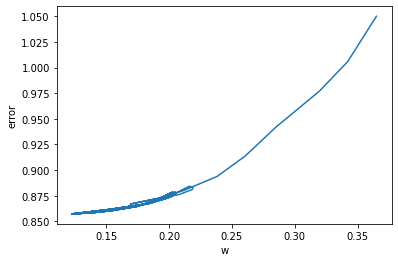

In [69]:
plt.plot(ww,err)
plt.xlabel('w')
plt.ylabel('error')

#### 경사하강법을 통해 구한 식을 plt.plot을 통한 직선, Age와 Fare의 분포는 plt.scatter로 같이 시각화 해봅시다

Text(0, 0.5, 'Fare')

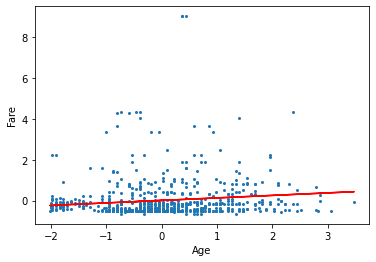

In [71]:
plt.plot(features_con_std['Age'],w*np.array(features_con_std['Age'])+b,c='r')
plt.scatter(features_con_std['Age'],features_con_std['Fare'],s=4)
plt.xlabel('Age')
plt.ylabel('Fare')

# 분류
## SGDclassifier

#### SGD classifier에 넣을 데이터는 target, features_con_std입니다

#### features_con_std, 그리고 target를 훈련, 테스트 데이터로 분할합시다(test_size = 0.3, random_state = 42)

In [72]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_con_std,target,test_size=0.3,random_state=42)

#### 훈련 데이터 셋을 SGDClassifier로 학습 시키고 훈련데이터로 점수를 확인해봅시다
#### SGDClassifier의 파라미터에 loss = 'log', max_iter = 100으로 지정해볼게요

In [73]:
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log',max_iter=100)
sc.fit(x_train, y_train)

print(sc.score(x_train, y_train))

0.6947791164658634


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [74]:
sc.score(x_test, y_test)

0.6635514018691588

## Cross-entropy

#### logistic 회귀 모델의 성능을 cross-entropy를 통해 평가해보겠습니다.

#### 우선 lg라는 logisticRegression 객체를 만듭시다

In [75]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

#### features_con_std와 target을 이용해 훈련, 테스트 데이터 셋을 나눠 줍시다
#### 그리고 모델에 fit시킵시다
#### test_size = 0.3, random_state = 42

In [135]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_con_std, target, test_size = 0.3, random_state = 42)
lg.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [143]:
lg.score(x_test,y_test)

0.6588785046728972

In [138]:
print(x_test.shape)
print(y_test.shape)


(214, 4)
(214, 1)


#### 시그모이드 함수(sigmoid(x))를 선언해주세요

In [124]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [142]:
x_test

,Age,SibSp,Parch,Fare
506,-0.389573,-0.552714,-0.506787,0.656556
394,1.681856,0.522511,-0.506787,0.826054
210,1.543761,0.522511,0.664747,0.852202
247,-0.803859,1.597735,1.836282,4.306266
437,-0.182430,-0.552714,-0.506787,-0.161947
...,...,...,...,...
653,0.922332,-0.552714,-0.506787,-0.531502
380,-0.527669,-0.552714,-0.506787,-0.511261
260,0.438999,-0.552714,-0.506787,1.910459
140,-0.803859,0.522511,0.664747,-0.504959


#### 다 구현하였다면 아래의 코드를 실행하여 예측치(확률)을 구합시다

In [145]:
pred = []
for i in (np.array(x_test).dot(lg.coef_.T)+ lg.intercept_[0]).reshape(-1):

  pred.append(sigmoid(i))
pred = np.array(pred)

In [140]:
y_test['Survived'].value_counts()

0    122
1     92
Name: Survived, dtype: int64

#### 아래의 cross_entropy 함수에 예측치와 실제값을 넣어주어 cross-entropy를 출력해주세요.
#### 단, 실제값(y_test)는 np.array로 변환해야 코드가 실행됩니다

In [141]:
def cross_entropy(pred, target):
    # 교차 엔트로피 합
    delta = 1e-7        # log 0을 계산할 수 없으므로, 아주 작은 값을 넣음
    return -np.sum(target * np.log(pred + delta))

cross_entropy(pred,np.array(y_test))

18267.631158417407

#### 위에서 구한 pred는 로지스틱을 통해 산출한 확률이었습니다

#### pred 배열을 전부 np.round로 반올림하고 int자료형으로 전환해 분류형으로 만들고 pred_int 변수에 저장해주세요

In [131]:
pred_int = np.round(pred).astype(int)
pred_int

array([1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

#### pred_int를 이용해 모델의 정확도를 구해주세요

In [132]:
from sklearn.metrics import accuracy_score
accuracy_score(pred_int,np.array(y_test))

0.6588785046728972

#### 성능이 너무 떨어지죠...? 이번엔 실습에서 제외하였던 변수들을 나머지 모두 사용하볼게요

#### 아까 따로 분리해둔 카테고리 변수를 더미변수로써 사용할 겁니다
#### 그전에 카테고리 변수들의 자료형을 features_cat.info()를 통해 확인해줍시다

In [83]:
features_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Pclass    712 non-null    int64
 1   Sex       712 non-null    int64
 2   Embarked  712 non-null    int64
dtypes: int64(3)
memory usage: 16.8 KB


#### 싹다 object 자료형으로 전환해주세요

In [86]:
features_cat['Pclass'] = features_cat['Pclass'].astype('object')
features_cat['Sex'] = features_cat['Sex'].astype('object')
features_cat['Embarked'] = features_cat['Embarked'].astype('object')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

#### pd.get_dummies를 통해 더미변수화 해주시되, drop_first=True를 꼭 추가해주세요

In [87]:
features_cat_dum = pd.get_dummies(features_cat,drop_first=True)

In [88]:
features_cat_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Pclass_1    712 non-null    uint8
 1   Pclass_2    712 non-null    uint8
 2   Sex_1       712 non-null    uint8
 3   Embarked_1  712 non-null    uint8
 4   Embarked_2  712 non-null    uint8
dtypes: uint8(5)
memory usage: 3.6 KB


#### 더미화된 데이터프레임, 그리고 아까 사용한 features_con_std 데이터프레임을
#### pd.concat을 활용해서 양옆으로 결합해주세요
#### 이 데이터 프레임은 features_com이란 변수에 저장해줍시다

In [89]:
features_com = pd.concat([features_cat_dum,features_con_std],axis=1)

In [90]:
features_com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass_1    712 non-null    uint8  
 1   Pclass_2    712 non-null    uint8  
 2   Sex_1       712 non-null    uint8  
 3   Embarked_1  712 non-null    uint8  
 4   Embarked_2  712 non-null    uint8  
 5   Age         712 non-null    float64
 6   SibSp       712 non-null    float64
 7   Parch       712 non-null    float64
 8   Fare        712 non-null    float64
dtypes: float64(4), uint8(5)
memory usage: 25.9 KB


#### features_com, target으로 훈련, 테스트 데이터를 나눕시다
#### 그리고 훈련데이터를 아까 선언한 lg에 fit해주세요
#### test_size = 0.3, random_state = 42

In [146]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_com, target, test_size = 0.3, random_state = 42)
lg.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

#### 위에서 구현한 로지스틱 회귀 코드를 그대로 가져왔습니다. 똑같이 실행해볼까요?

In [147]:
pred = []
for i in (np.array(x_test).dot(lg.coef_.T)+ lg.intercept_[0]).reshape(-1):
  pred.append(sigmoid(i))
pred = np.array(pred)

#### cross-entropy와 정확도를 확인해주세요(각 함수들의 괄호를 채워주시면 됩니다)

In [148]:
cross_entropy(pred,np.array(y_test))

26184.750175548455

(214,)

In [114]:
pred_int = np.round(pred).astype(int)
pred_int

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0])

In [115]:
accuracy_score(pred_int,np.array(y_test))

0.8037383177570093

In [118]:
# 문제 만드느라 고생많으셨습니다 설명도 자연스럽고 정성이 느껴지네요!!
 

#### 성능이 좋아졌으면 성공하셨고, 아니면 실수한 부분 없는지 체크해보시면 될 듯 합니다!

#### 로지스틱도 경사하강법으로 계수랑 절편 찾는 거 구현하고 싶었는데 능력부족으로 하지 못했습니다 

https://tobigs.gitbook.io/tobigs/data-analysis/undefined-1/python-1

혹시라도 관심있으신 분들은 이 링크 참조해주시면 될 거 같아요!!

고생 많으셨습니다.